In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
agePeople = pd.read_csv('../../Data/people/행정안전부_주민등록_인구_및_세대현황.csv', index_col=0)#, encoding='euc-kr')#, index_col='시점')
agePeople.head()

,년도,나이,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별시
1,2014,0-9,793992,263767,208524,270156,145156,148662,114860,19524,1243973,124511,142815,196099,161307,157224,222679,316462,61663
2,2014,10-19,1044513,366769,307096,339868,207671,196196,148060,17155,1533881,178979,188890,237378,228459,220929,291169,402689,79202
3,2014,20-29,1457951,456897,323936,398391,197540,210031,156137,17532,1608430,181760,194013,242365,217542,204149,312801,391686,70883
4,2014,30-39,1713666,504816,353237,461260,227820,237696,182664,27648,1991551,194502,220756,300806,239288,228077,356199,486893,84968
5,2014,40-49,1729469,576487,446088,521070,260090,271600,216238,26757,2303367,252750,265726,333778,303136,296355,433992,585426,107887


In [4]:
agePeople.shape

(88, 19)

In [5]:
agePeople['나이'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80-89', '90-99', '100-'], dtype=object)

In [6]:
agePeople.년도.unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [7]:
agePeople

,년도,나이,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별시
1,2014,0-9,793992,263767,208524,270156,145156,148662,114860,19524,1243973,124511,142815,196099,161307,157224,222679,316462,61663
2,2014,10-19,1044513,366769,307096,339868,207671,196196,148060,17155,1533881,178979,188890,237378,228459,220929,291169,402689,79202
3,2014,20-29,1457951,456897,323936,398391,197540,210031,156137,17532,1608430,181760,194013,242365,217542,204149,312801,391686,70883
4,2014,30-39,1713666,504816,353237,461260,227820,237696,182664,27648,1991551,194502,220756,300806,239288,228077,356199,486893,84968
5,2014,40-49,1729469,576487,446088,521070,260090,271600,216238,26757,2303367,252750,265726,333778,303136,296355,433992,585426,107887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021,60-69,1285922,548878,342291,399128,172124,190514,155775,33522,1669601,260158,241697,299801,268393,284871,433047,494113,84877
85,2021,70-79,695800,298128,177828,179244,94547,92390,63024,14775,773573,132627,120068,172067,170337,191022,244151,249720,45783
86,2021,80-89,295009,123791,82781,82853,42636,43199,24119,7557,374488,76586,69193,104173,95991,115490,140963,131422,25230
87,2021,90-99,41735,15457,10122,13041,6066,6155,3276,1288,55363,11658,9592,15528,14839,17216,20313,18682,4213


In [8]:
agePeople[agePeople.년도 == 2014]

,년도,나이,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별시
1,2014,0-9,793992,263767,208524,270156,145156,148662,114860,19524,1243973,124511,142815,196099,161307,157224,222679,316462,61663
2,2014,10-19,1044513,366769,307096,339868,207671,196196,148060,17155,1533881,178979,188890,237378,228459,220929,291169,402689,79202
3,2014,20-29,1457951,456897,323936,398391,197540,210031,156137,17532,1608430,181760,194013,242365,217542,204149,312801,391686,70883
4,2014,30-39,1713666,504816,353237,461260,227820,237696,182664,27648,1991551,194502,220756,300806,239288,228077,356199,486893,84968
5,2014,40-49,1729469,576487,446088,521070,260090,271600,216238,26757,2303367,252750,265726,333778,303136,296355,433992,585426,107887
6,2014,50-59,1604160,630397,415681,482300,212836,237648,196210,20781,1896033,267736,255182,313612,293042,304092,451711,542595,92145
7,2014,60-69,980220,401805,235408,232989,119644,124378,90542,12369,936958,160635,146731,196659,198061,214646,292417,309526,53120
8,2014,70-79,568848,235574,148568,138554,74942,74926,44785,9688,599700,130099,115403,163686,157179,192592,235172,218473,38415
9,2014,80-89,177339,72728,48605,49951,26232,26713,14847,4081,210845,45895,43469,68455,64428,76455,92195,86183,15722
10,2014,90-99,28404,8754,5620,7451,3653,3699,1906,556,30333,7021,5548,8814,8515,10560,11767,9768,3140


In [9]:
seoul14 = agePeople[agePeople['년도']==2014].iloc[:,0:3]
aeoul21 = agePeople[agePeople['년도']==2021].iloc[:,0:3]
aeoul21.set_index(keys='나이',inplace=True, drop=True)
aeoul21.drop(['년도'], axis=1, inplace=True)
seoul14.set_index(keys='나이',inplace=True, drop=True)
seoul14.drop(['년도'], axis=1, inplace=True)
# seoul1421 = pd.concat([agePeople[agePeople['년도']==2014].iloc[:,0:3],agePeople[agePeople['년도']==2021].iloc[:,0:3]], axis=1)
# seoul1421.set_index(keys='나이',inplace=True, drop=True)
# seoul1421.drop(['년도'], axis=1, inplace=True)
# seoul1421
seoul1421 = pd.concat([seoul14,aeoul21], axis=1)
seoul1421.columns = ['2014년 서울','2021년 서울']

In [10]:
seoul1421

,2014년 서울,2021년 서울
나이,,
0-9,793992,583683
10-19,1044513,756136
20-29,1457951,1422277
30-39,1713666,1439279
40-49,1729469,1480780
50-59,1604160,1507194
60-69,980220,1285922
70-79,568848,695800
80-89,177339,295009


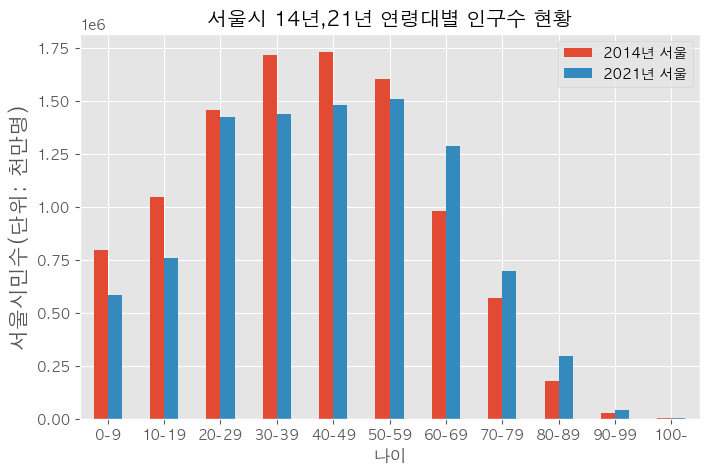

In [11]:
plt.style.use('ggplot')
seoul1421.plot(
    kind='bar', 
    figsize=(8,5),
    # color = terrain.colors,
    )

plt.xticks(rotation="horizontal",size=10) # vertical은 90도
plt.ylabel("서울시민수(단위: 천만명)", size=15)
plt.title('서울시 14년,21년 연령대별 인구수 현황')

plt.show()

In [12]:
gyungi = agePeople[['나이','경기도']]
gyungi['년도'] = gyungi.index
gyungi.set_index('나이',inplace=True, drop=True)
gyungi

,경기도,년도
나이,,
0-9,1243973,1
10-19,1533881,2
20-29,1608430,3
30-39,1991551,4
40-49,2303367,5
...,...,...
60-69,1669601,84
70-79,773573,85
80-89,374488,86


In [13]:
gyungi14 = gyungi[gyungi['년도']==2014]
gyungi21 = gyungi[gyungi['년도']==2021]
gyungi14.drop(['년도'], axis=1, inplace=True)
gyungi21.drop(['년도'], axis=1, inplace=True)
gyungi1421 = pd.concat([gyungi14,gyungi21], axis=1)
gyungi1421.columns = ['2014년 경기도','2021년 경기도']

In [14]:
# plt.style.use('ggplot')
# gyungi1421.plot(
#     kind='bar', 
#     figsize=(8,5),
#     # legend=15
#     )
# plt.xticks(rotation="horizontal",size=10) # vertical은 90도
# plt.ylabel("경기도민수(단위:천만명)", size=15)
# plt.title('경기도 14년,21년 연령대별 인구수 현황')
# plt.show()

In [15]:
northGyungsang = agePeople[['나이','경상북도']]
northGyungsang['년도'] = northGyungsang.index
northGyungsang.set_index('나이',inplace=True, drop=True)
northGyungsang

,경상북도,년도
나이,,
0-9,222679,1
10-19,291169,2
20-29,312801,3
30-39,356199,4
40-49,433992,5
...,...,...
60-69,433047,84
70-79,244151,85
80-89,140963,86


In [16]:
northGyungsang14 = northGyungsang[northGyungsang['년도']==2014]
northGyungsang21 = northGyungsang[northGyungsang['년도']==2021]
northGyungsang14.drop(['년도'], axis=1, inplace=True)
northGyungsang21.drop(['년도'], axis=1, inplace=True)
northGyungsang1421 = pd.concat([northGyungsang14,northGyungsang21], axis=1)
northGyungsang1421.columns = ['2014년 경상북도','2021년 경상북도']

In [17]:
# plt.style.use('ggplot')
# northGyungsang1421.plot(
#     kind='bar', 
#     figsize=(8,5),
#     # legend=15
#     )
# plt.xticks(rotation="horizontal",size=10) # vertical은 90도
# plt.ylabel("경상북도 도민수(단위:명)", size=15)
# plt.title('경상북도 14년,21년 연령대별 인구수 현황')
# plt.show()

## 인구피라미드

In [18]:
agePeople2020 = agePeople[agePeople['년도']==2020]
agePeople2020['합계']=agePeople2020.sum(axis=1)
agePeople2020.set_index(keys='나이',inplace=True,drop=True)
agePeople2020 = agePeople2020['합계']

In [19]:
aP2020Hap = agePeople2020.sum(axis=0)
aP2020Hap
#= 51829023

51851243

In [20]:
agePeople2020=pd.DataFrame(agePeople2020)

In [21]:
agePeople2020

,합계
나이,
0-9,3972090
10-19,4795356
20-29,6808173
30-39,6875137
40-49,8296807
50-59,8647034
60-69,6746526
70-79,3700266
80-89,1731442


In [22]:
agePeople2020.iloc[4,0]  / aP2020Hap * 100

16.00117281662852

In [23]:
percent=[]
i = 0
for age in list(agePeople2020.index):
    percent.append(round((agePeople2020.iloc[i,] / aP2020Hap * 100).합계,2))
    i+=1

In [24]:
round((agePeople2020.iloc[3,] / aP2020Hap * 100).합계,2)

13.26

In [25]:
agePeople2020['백분율'] = percent

In [26]:
agePeople2020.columns=['2020년 인구합','백분율']

In [27]:
agePeople2020

,2020년 인구합,백분율
나이,,
0-9,3972090,7.66
10-19,4795356,9.25
20-29,6808173,13.13
30-39,6875137,13.26
40-49,8296807,16.00
50-59,8647034,16.68
60-69,6746526,13.01
70-79,3700266,7.14
80-89,1731442,3.34


#### 2020년 인구 피라미드 나중에 만들기

In [28]:
agePeople

,년도,나이,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별시
1,2014,0-9,793992,263767,208524,270156,145156,148662,114860,19524,1243973,124511,142815,196099,161307,157224,222679,316462,61663
2,2014,10-19,1044513,366769,307096,339868,207671,196196,148060,17155,1533881,178979,188890,237378,228459,220929,291169,402689,79202
3,2014,20-29,1457951,456897,323936,398391,197540,210031,156137,17532,1608430,181760,194013,242365,217542,204149,312801,391686,70883
4,2014,30-39,1713666,504816,353237,461260,227820,237696,182664,27648,1991551,194502,220756,300806,239288,228077,356199,486893,84968
5,2014,40-49,1729469,576487,446088,521070,260090,271600,216238,26757,2303367,252750,265726,333778,303136,296355,433992,585426,107887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021,60-69,1285922,548878,342291,399128,172124,190514,155775,33522,1669601,260158,241697,299801,268393,284871,433047,494113,84877
85,2021,70-79,695800,298128,177828,179244,94547,92390,63024,14775,773573,132627,120068,172067,170337,191022,244151,249720,45783
86,2021,80-89,295009,123791,82781,82853,42636,43199,24119,7557,374488,76586,69193,104173,95991,115490,140963,131422,25230
87,2021,90-99,41735,15457,10122,13041,6066,6155,3276,1288,55363,11658,9592,15528,14839,17216,20313,18682,4213


## 2020년 기준으로 대한민국의 경제활동 연령인 20~40대의 경우 54.5%가 수도권에 거주하고 있다.\ 검증

In [29]:
청년층 = agePeople[agePeople['년도']==2020]
청년층 = 청년층.iloc[2:4,]

In [30]:
list(청년층.columns)

['년도',
 '나이',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별시']

In [31]:
청년층수도권 = 청년층[['나이','서울특별시','인천광역시','경기도']]
청년층비수도권 = 청년층[['나이', '부산광역시', '대구광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별시', '강원도', '충청북도',
 '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별시']]

In [32]:
청년층수도권['합계']=청년층수도권.sum(axis=1)
청년층수도권


,나이,서울특별시,인천광역시,경기도,합계
69,20-29,1460411,401546,1807848,3669805
70,30-39,1475106,406146,1907459,3788711


In [33]:
청년층비수도권['합계']=청년층비수도권.sum(axis=1)
청년층비수도권


,나이,부산광역시,대구광역시,광주광역시,대전광역시,울산광역시,세종특별시,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별시,합계
69,20-29,430987,321534,209375,212488,144569,37453,180015,199209,243200,211464,200709,284163,378436,82746,3136348
70,30-39,419014,294310,185867,194088,151705,61492,166349,194677,268598,189012,186064,291117,399558,82555,3084406


In [34]:
청년층수도권.set_index(keys='나이',inplace=True,drop=True)
청년층수도권 = pd.DataFrame(청년층수도권['합계'])
청년층비수도권.set_index(keys='나이',inplace=True,drop=True)
청년층비수도권 = pd.DataFrame(청년층비수도권['합계'])
청년층비수도권.columns=['비수도권 합']
청년층수도권.columns=['수도권 합']

In [35]:
청년층합 = pd.concat([pd.DataFrame(청년층수도권['수도권 합']),pd.DataFrame(청년층비수도권['비수도권 합'])],axis=1)
청년층합

,수도권 합,비수도권 합
나이,,
20-29,3669805,3136348
30-39,3788711,3084406


In [36]:
print(청년층합.sum(axis=0)['수도권 합'])
수도권20to39 = 청년층합.sum(axis=0)['수도권 합']
print(청년층합.sum(axis=0)['비수도권 합'])
비수도권20to39 = 청년층합.sum(axis=0)['비수도권 합']

7458516
6220754


In [37]:
청년층합['총 합'] = 청년층합.sum(axis=1)

In [38]:
청년층합.sum(axis=0)

수도권 합      7458516
비수도권 합     6220754
총 합       13679270
dtype: int64

In [39]:
청년층합.loc[2] = [7458516, 6220754, 13679270]


In [40]:
청년층합.index=['20-29','30-39','20-39']

In [41]:
청년층합['수도권 비율'] = [53.92,55.12,54.52]

In [42]:
age20to39Hap = 청년층합.sum(axis=0)['수도권 합'] + 청년층합.sum(axis=0)['비수도권 합']

In [43]:
round((3669805/6806153 *100),2)

53.92

In [44]:
청년층합[['수도권 합','수도권 비율','비수도권 합','총 합']]

,수도권 합,수도권 비율,비수도권 합,총 합
20-29,3669805,53.92,3136348,6806153
30-39,3788711,55.12,3084406,6873117
20-39,7458516,54.52,6220754,13679270


In [45]:
청년층합.iloc[1:2,:][['수도권 합','비수도권 합']]

,수도권 합,비수도권 합
30-39,3788711,3084406


In [46]:
청년층합2 = 청년층합[['수도권 합','비수도권 합']]


In [47]:
청년층합2.T['20-39']

수도권 합     7458516
비수도권 합    6220754
Name: 20-39, dtype: int64

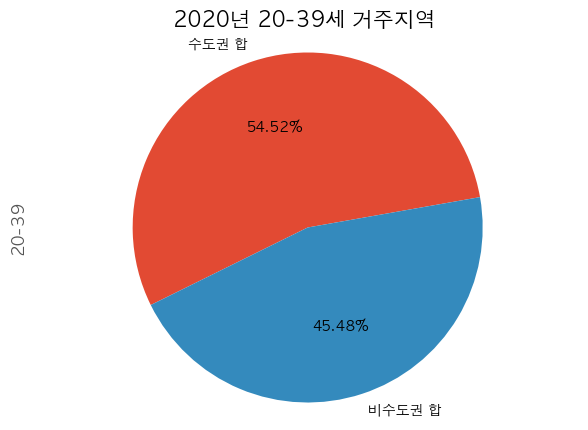

In [48]:
# 청년층합.iloc[1:2,:][['수도권 합','비수도권 합']].plot(
# 청년층합.T.iloc[0:2,1:2].plot(
청년층합2.T['20-39'].plot(
    kind='pie',
    figsize=(7,5),
    autopct = '%.2f%%', # auto percent
    startangle = 10, # 시작지점을 약간 10도 삐딱하게 만들어서 챠트를 그리고 싶다 
    # colors=['chocolate','bisque'],
    # colors=['chocolate','bisque','cadetblue'],
)
plt.title('2020년 20-39세 거주지역 ', size=15)
plt.axis('equal') # << pie chart 원이 삐딱할때가 있는데 이걸 쓰면 이쁜 원이 만들어진다..??
# plt.legend(
#     labels=df.origin.index,
#     loc='upper right',
# )
plt.show()

In [49]:
청년층합2.T['20-39']

수도권 합     7458516
비수도권 합    6220754
Name: 20-39, dtype: int64

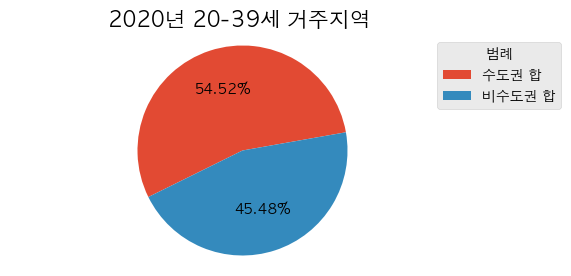

In [50]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
# wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
#                                   textprops=dict(color="w"))

ax.pie(
    data = pd.DataFrame(청년층합2.T['20-39']),
    x = pd.DataFrame(청년층합2.T['20-39'])['20-39'],
    autopct = '%.2f%%',
    startangle = 10,
)

ax.legend(pd.DataFrame(청년층합2.T['20-39']).index,
          title="범례",
          bbox_to_anchor=(0.7, 0, 0.5, 1)
)
plt.title('2020년 20-39세 거주지역 ', size=15)
plt.axis('equal') # << pie chart 원이 삐딱할때가 있는데 이걸 쓰면 이쁜 원이 만들어진다..??
plt.show()

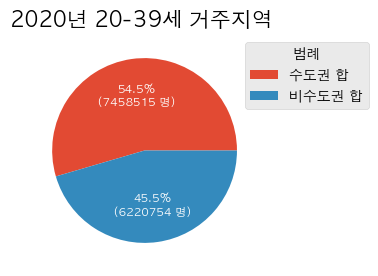

In [51]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
청년층합2.T['20-39']
recipe = ["7458516 7458516",
          "6220754 6220754"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} 명)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

# ax.legend(wedges, ingredients,
#           title="Ingredients",
#           loc="center left",
#           bbox_to_anchor=(1, 0, 0.5, 1))
ax.legend(pd.DataFrame(청년층합2.T['20-39']).index,
          title="범례",
          bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.setp(autotexts, size=8, weight="bold")

ax.set_title('2020년 20-39세 거주지역 ', size=15)

plt.show()

## 노령인구가 가파르게 증가

In [52]:
columns = [ '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별시', '경기도', '강원도', '충청북도',
 '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별시']

In [53]:
agePeople['합'] = agePeople[columns].sum(axis=1)

In [54]:
agePeople.set_index(keys='년도', inplace=True,drop=True)
agePeopleHap = agePeople[['나이','합']]

In [55]:
list(agePeople.index.unique())

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [56]:
agePeople[agePeople['나이'] == '0-9']['합']

년도
2014    4591374
2015    4601688
2016    4566168
2017    4435198
2018    4303062
2019    4166914
2020    3970070
2021    3760350
Name: 합, dtype: int64

In [57]:
agesList = list(agePeopleHap['나이'].unique())
agesList

['0-9',
 '10-19',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90-99',
 '100-']

In [58]:
agePeople[agePeople['나이'] == '10-19']['합']

년도
2014    5988904
2015    5717089
2016    5481038
2017    5304425
2018    5131153
2019    4959010
2020    4793336
2021    4709316
Name: 합, dtype: int64

In [59]:
if agePeople[agePeople['나이'] == '0-9']['합'][2014] > agePeople[agePeople['나이'] == '0-9']['합'][2021]:
    print('작아짐')
else: print('커짐')

작아짐


In [60]:
agePeople[agePeople['나이'] ==age]['합'][2014]

15006

In [61]:
agePeople[agePeople['나이'] == age ]

,나이,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별시,합
년도,,,,,,,,,,,,,,,,,,,
2014,100-,4671,1407,501,618,300,260,128,34,2759,554,400,621,603,701,692,556,201,15006
2015,100-,5037,1489,543,701,314,281,139,34,3008,608,440,680,639,753,734,596,213,16209
2016,100-,5475,1585,591,754,355,308,138,49,3305,656,471,738,697,759,811,639,231,17562
2017,100-,5519,1614,615,791,345,314,153,49,3369,697,477,754,706,739,813,653,242,17850
2018,100-,5843,1665,628,826,371,319,158,54,3602,711,521,779,748,775,858,678,247,18783
2019,100-,6244,1790,678,883,399,333,158,53,3914,794,534,865,804,795,927,719,270,20160
2020,100-,6792,1887,733,969,424,371,175,50,4315,864,569,921,856,870,993,827,296,21912
2021,100-,1643,402,245,417,177,169,67,27,1760,358,268,417,405,464,553,394,195,7961


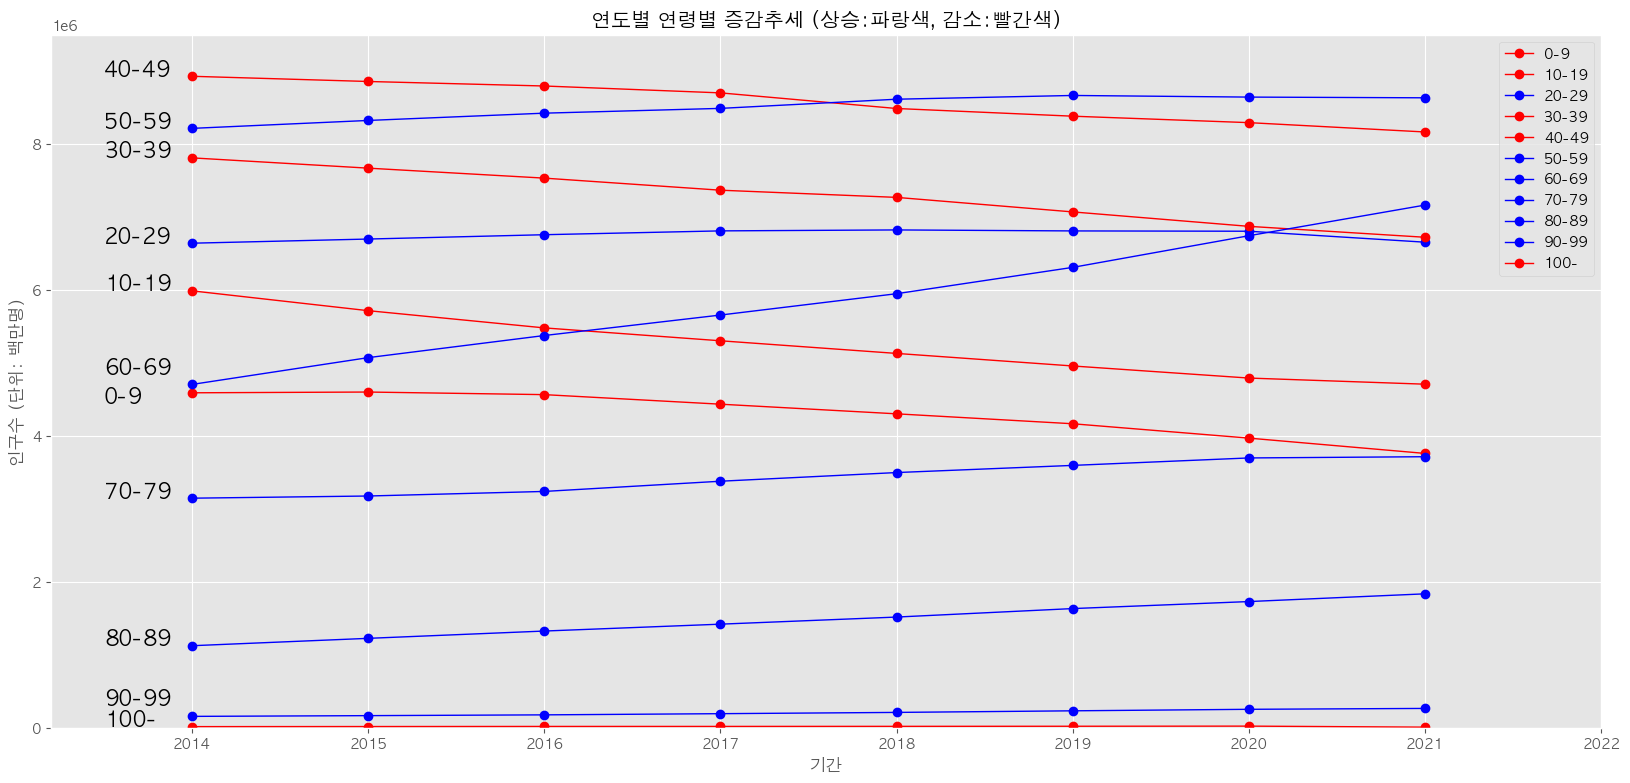

In [62]:
# colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue',
#            'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray', 'black']
agesList = list(agePeopleHap['나이'].unique())
i = 0
plt.style.use("ggplot")

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(1,1,1)
for age in agesList:
    # if조건으로 2014년보다 인구수가 줄어들었으면 빨간줄, 늘었다면 파란줄 생성 
    if agePeople[agePeople['나이'] ==age]['합'][2014] > agePeople[agePeople['나이'] == age]['합'][2021]:
        colors = 'red'
    else : colors= 'blue'
    # line 그래프
    ax.plot(
        list(agePeople.index.unique()),
        agePeople[agePeople['나이'] ==age]['합'],
        marker="o",
        # color=colors[i],
        color=colors,
        linewidth=1,
    )
    # 스타트점에 연령대 텐ㄱ스트 
    if agesList[i]=='60-69':
        ax.text(
        2013.5 ,
        agePeople[agePeople['나이'] ==age]['합'][2014]+140000,
        agesList[i],
        fontsize=15,
    )
    elif agesList[i]=='0-9':
        ax.text(
        2013.5 ,
        agePeople[agePeople['나이'] ==age]['합'][2014]-140000,
        agesList[i],
        fontsize=15,
    )
    elif agesList[i]=='90-99':
        ax.text(
        2013.5 ,
        agePeople[agePeople['나이'] ==age]['합'][2014]+150000,
        agesList[i],
        fontsize=15,
    )
    else:
        ax.text(
            2013.5 ,
            agePeople[agePeople['나이'] ==age]['합'][2014],
            agesList[i],
            fontsize=15,
        )
    i+=1

ax.legend(agesList, loc="best")
plt.ylim(0,9500000)
plt.xlim(2013.2,2022)
ax.set_title("연도별 연령별 증감추세 (상승:파랑색, 감소:빨간색)")
ax.set_xlabel("기간", size=12)
ax.set_ylabel("인구수 (단위: 백만명)", size=12)
# ax.set_xticklabels(df_3.columns, rotation=90)

plt.show()

In [63]:
for age in agesList:
    print(age)

0-9
10-19
20-29
30-39
40-49
50-59
60-69
70-79
80-89
90-99
100-


## 연령별 년도별 지역인구수 챠트 다시 그리기

In [64]:
agePeople2020 = agePeople[agePeople.index==2020]
agePeople2020.drop(columns='합', inplace=True)
agePeople2020.set_index(keys='나이',inplace=True,drop=True)
agePeople2020 = agePeople2020[['서울특별시', '경기도','인천광역시', '부산광역시', '대구광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별시',  '강원도', '충청북도',
 '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별시']]

In [65]:
# colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue',
#            'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray', 'black']

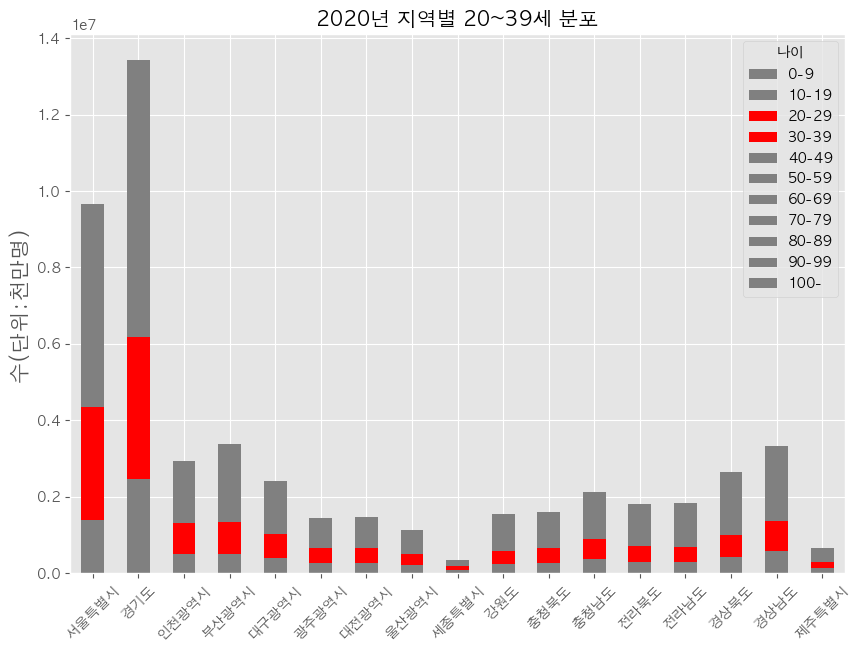

In [66]:
colors = ['gray', 'gray', 'red', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
           'gray', 'gray', 'purple', 'rosybrown', 'pink', 'gray', 'black']
# colors = ['purple', 'salmon', 'red', 'red', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue',
#            'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray', 'black']

plt.style.use('ggplot')
agePeople2020.T.plot(
    kind='bar', 
    figsize=(10,7),
    color = colors,
    stacked=True
    )

plt.xticks(rotation="horizontal",size=10) # vertical은 90도
plt.ylabel("수(단위:천만명)", size=15)
plt.title('2020년 지역별 20~39세 분포')
plt.xticks(rotation=45)
plt.show()

In [67]:
agePeople2014 = agePeople[agePeople[['나이','합']].index==2014][['나이','합']]
agePeople2015 = agePeople[agePeople[['나이','합']].index==2015][['나이','합']]
agePeople2016 = agePeople[agePeople[['나이','합']].index==2016][['나이','합']]
agePeople2017 = agePeople[agePeople[['나이','합']].index==2017][['나이','합']]
agePeople2018 = agePeople[agePeople[['나이','합']].index==2018][['나이','합']]
agePeople2019 = agePeople[agePeople[['나이','합']].index==2019][['나이','합']]
agePeople2020 = agePeople[agePeople[['나이','합']].index==2020][['나이','합']]
agePeople2021 = agePeople[agePeople[['나이','합']].index==2021][['나이','합']]

In [68]:
justforFor = agePeople[['나이','합']]

In [69]:
agePeople2021.set_index(keys='나이',inplace=True, drop=True)

In [70]:
print(agePeople2021.sum(axis=1)[['0-9','10-19']].sum())
print(agePeople2021.sum(axis=1)[['20-29', '30-39', '40-49', '50-59']].sum())
print(agePeople2021.sum(axis=1)[['60-69', '70-79', '80-89', '90-99', '100-']].sum())


8469666
30181361
12987782


In [71]:
justforFor

,나이,합
년도,,
2014,0-9,4591374
2014,10-19,5988904
2014,20-29,6642044
2014,30-39,7811847
2014,40-49,8930216
...,...,...
2021,60-69,7164712
2021,70-79,3715084
2021,80-89,1835481


In [72]:
age10_19=[]
age20_59 =[]
age60_ =[]
years = [year for year in range(2014,2022)]
for year in years:
    age10_19.append(list(justforFor[(justforFor.index == year) & (justforFor['나이']=='0-9')]['합'] + justforFor[(justforFor.index == year) & (justforFor['나이']=='10-19')]['합'])[0])
    age20_59.append(
        list(justforFor[(justforFor.index == year) & (justforFor['나이']=='20-29')]['합'] + \
        justforFor[(justforFor.index == year) & (justforFor['나이']=='30-39')]['합'] +\
        justforFor[(justforFor.index == year) & (justforFor['나이']=='40-49')]['합'] +\
        justforFor[(justforFor.index == year) & (justforFor['나이']=='50-59')]['합'])[0]
    )
    age60_.append(
        list(justforFor[(justforFor.index == year) & (justforFor['나이']=='60-69')]['합'] + \
     justforFor[(justforFor.index == year) & (justforFor['나이']=='70-79')]['합'] +\
     justforFor[(justforFor.index == year) & (justforFor['나이']=='90-99')]['합'] +\
     justforFor[(justforFor.index == year) & (justforFor['나이']=='100-')]['합'])[0]
    )

In [73]:
년도별연령별 = pd.DataFrame(
    [
    age10_19,age20_59,age60_
    ],
    index=['0-19','20-59','60-'],
    columns=years
).T

In [74]:
년도별연령별['60-']

2014     8023227
2015     8431553
2016     8809434
2017     9246750
2018     9676265
2019    10158614
2020    10717124
2021    11152301
Name: 60-, dtype: int64

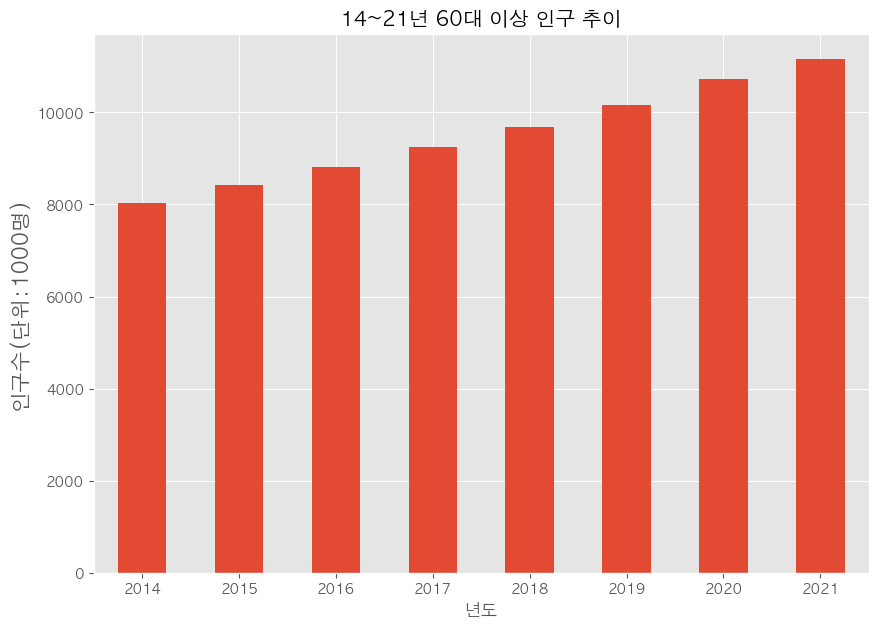

In [75]:
plt.style.use('ggplot')
(년도별연령별['60-']/1000).plot(
    kind='bar', 
    figsize=(10,7),
    )
plt.ylabel("인구수(단위:1000명)", size=15)
plt.title('14~21년 60대 이상 인구 추이')
# plt.ylim(0,12000000)
plt.fmt = 'd'
plt.xticks(rotation=360)
plt.xlabel('년도')
plt.show()

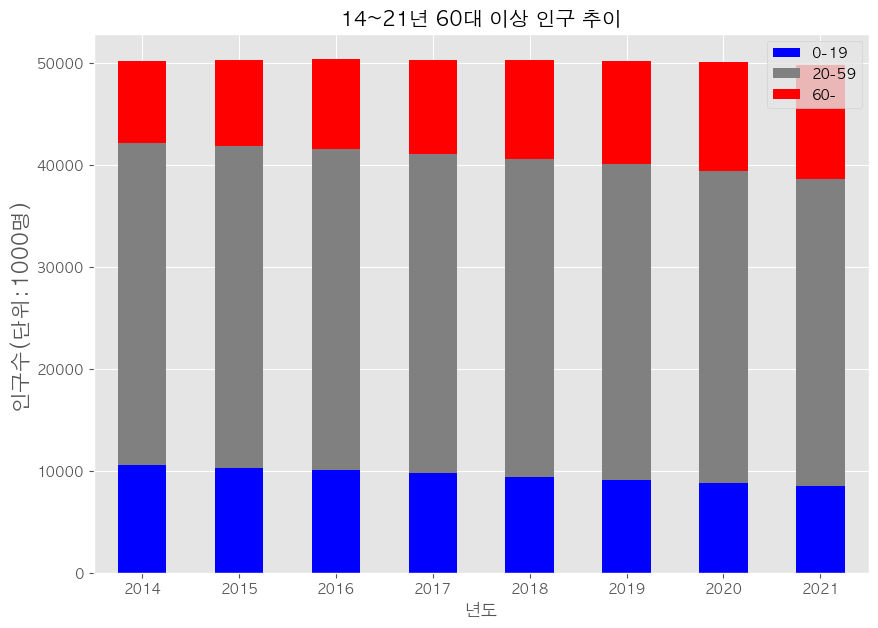

In [76]:
plt.style.use('ggplot')
(년도별연령별/1000).plot(
    kind='bar', 
    figsize=(10,7),
    stacked=True,
    color = ['blue','grey','red']
    )
plt.ylabel("인구수(단위:1000명)", size=15)
plt.title('14~21년 60대 이상 인구 추이')
# plt.ylim(0,12000000)
plt.fmt = 'd'
plt.xticks(rotation=360)
plt.xlabel('년도')
plt.show()

In [77]:
년도별연령별['작년도 60- 인구수'] = 년도별연령별['60-'].shift(1) #< shift: 전(prev) 행의 데이터를 선택
년도별연령별

,0-19,20-59,60-,작년도 60- 인구수
2014,10580278,31600268,8023227,NaN
2015,10318777,31553798,8431553,8023227.0
2016,10047206,31514282,8809434,8431553.0
2017,9739623,31372572,9246750,8809434.0
2018,9434215,31198587,9676265,9246750.0
2019,9125924,30931987,10158614,9676265.0
2020,8763406,30619071,10717124,10158614.0
2021,8469666,30181361,11152301,10717124.0


In [78]:
년도별연령별['증감폭'] = (년도별연령별['60-'] / 년도별연령별['작년도 60- 인구수'] - 1) *100
년도별연령별

,0-19,20-59,60-,작년도 60- 인구수,증감폭
2014,10580278,31600268,8023227,NaN,NaN
2015,10318777,31553798,8431553,8023227.0,5.089299
2016,10047206,31514282,8809434,8431553.0,4.481748
2017,9739623,31372572,9246750,8809434.0,4.964178
2018,9434215,31198587,9676265,9246750.0,4.645037
2019,9125924,30931987,10158614,9676265.0,4.984868
2020,8763406,30619071,10717124,10158614.0,5.497896
2021,8469666,30181361,11152301,10717124.0,4.060576


In [79]:
년도별연령별[['0-19','20-59','60-']]

,0-19,20-59,60-
2014,10580278,31600268,8023227
2015,10318777,31553798,8431553
2016,10047206,31514282,8809434
2017,9739623,31372572,9246750
2018,9434215,31198587,9676265
2019,9125924,30931987,10158614
2020,8763406,30619071,10717124
2021,8469666,30181361,11152301


In [80]:
년도별연령별['증감폭']

2014         NaN
2015    5.089299
2016    4.481748
2017    4.964178
2018    4.645037
2019    4.984868
2020    5.497896
2021    4.060576
Name: 증감폭, dtype: float64

In [81]:
nanda = 년도별연령별['증감폭']

In [113]:
# nandaindex = 년도별연령별.index
년도별연령별.index

Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64')

In [83]:
년도별연령별

,0-19,20-59,60-,작년도 60- 인구수,증감폭
2014,10580278,31600268,8023227,NaN,NaN
2015,10318777,31553798,8431553,8023227.0,5.089299
2016,10047206,31514282,8809434,8431553.0,4.481748
2017,9739623,31372572,9246750,8809434.0,4.964178
2018,9434215,31198587,9676265,9246750.0,4.645037
2019,9125924,30931987,10158614,9676265.0,4.984868
2020,8763406,30619071,10717124,10158614.0,5.497896
2021,8469666,30181361,11152301,10717124.0,4.060576


In [84]:
년도별연령별.index

Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64')

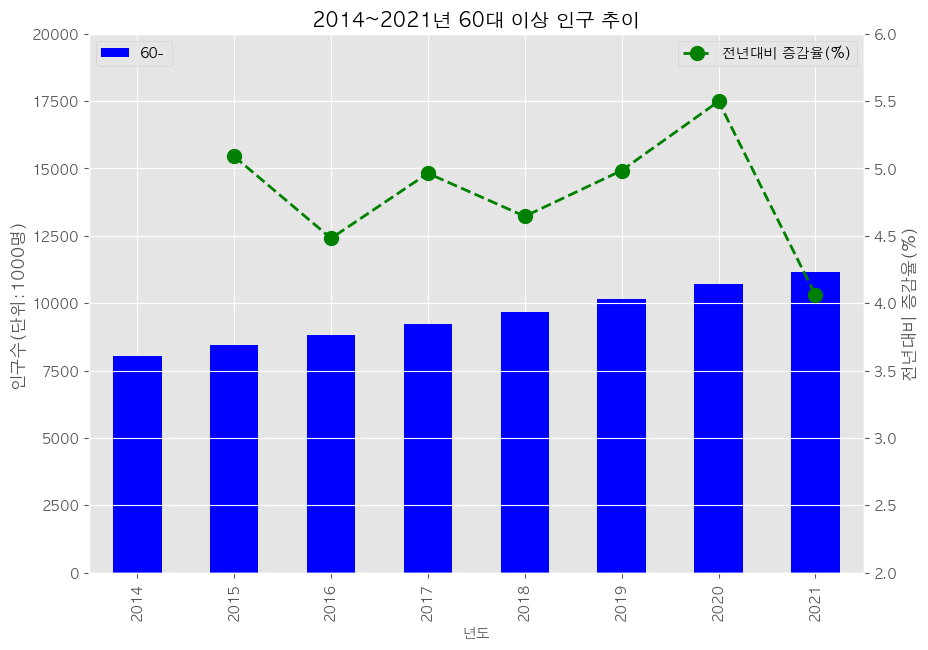

In [129]:
plt.style.use('ggplot')

# ax1 = (년도별연령별[['0-19','20-59','60-']]/1000).plot(
ax1 = (년도별연령별[['60-']]/1000).plot(
    kind='bar', 
    figsize=(10,7),
    stacked=True,
    color = ['blue','grey','red']
)
ax2 = ax1.twinx() 
ax2.plot(
    [0,1,2,3,4,5,6,7],
    년도별연령별['증감폭'],
    ls='--', # line style
    marker = 'o',
    markersize = 10,
    color = 'green',
    markerfacecolor="green",
    linewidth=2,
    label='전년대비 증감율(%)'
)
ax1.set_ylim(0000, 20000)
# ax2.set_ylim(-10, 10)
ax2.set_ylim(2, 6)

ax1.set_xlabel('년도',size = 10)
ax1.set_ylabel("인구수(단위:1000명)")
ax2.set_ylabel('전년대비 증감율(%)')

plt.title('2014~2021년 60대 이상 인구 추이', size = 14)

ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)

plt.show()

In [130]:
년도별연령별['증감폭']

2014         NaN
2015    5.089299
2016    4.481748
2017    4.964178
2018    4.645037
2019    4.984868
2020    5.497896
2021    4.060576
Name: 증감폭, dtype: float64

In [162]:
result = 0


for i in list(round(년도별연령별['증감폭'],2)[1:]):
    result += i
    print(result)

5.09
9.57
14.530000000000001
19.18
24.16
29.66
33.72


In [159]:
list(round(년도별연령별['증감폭'],2))

[nan, 5.09, 4.48, 4.96, 4.65, 4.98, 5.5, 4.06]

In [168]:
증감폭 = []
result = 0
for i in list(round(년도별연령별['증감폭'],2)[1:]):
    result += i
    if len(증감폭) == 0:
        증감폭.append(0)
    증감폭.append(result)
증감폭

[0, 5.09, 9.57, 14.530000000000001, 19.18, 24.16, 29.66, 33.72]

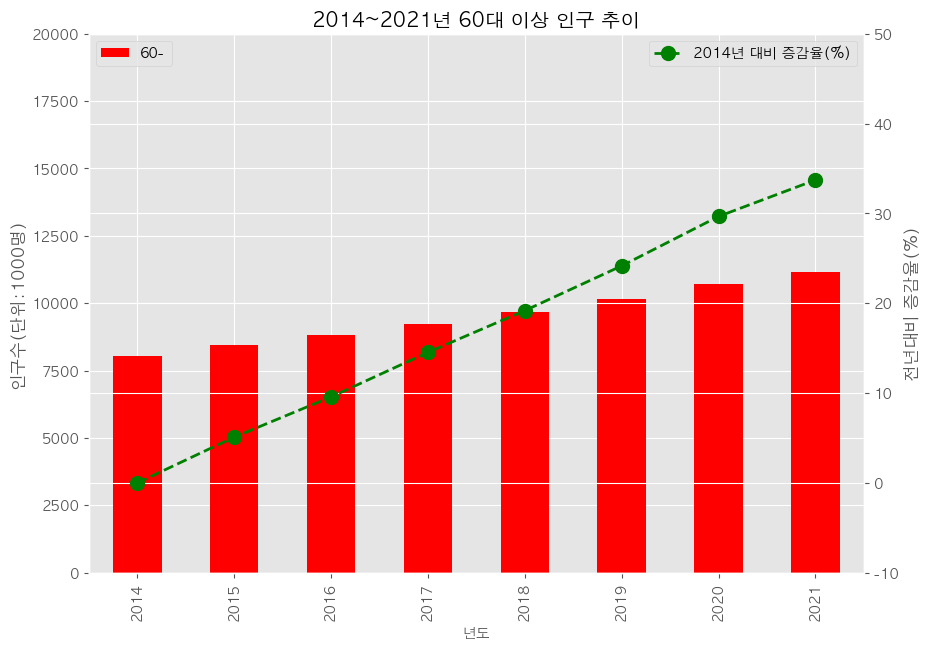

In [172]:
plt.style.use('ggplot')

# ax1 = (년도별연령별[['0-19','20-59','60-']]/1000).plot(
ax1 = (년도별연령별[['60-']]/1000).plot(
    kind='bar', 
    figsize=(10,7),
    stacked=True,
    color = ['red','grey','red']
)
ax2 = ax1.twinx() 
ax2.plot(
    [0,1,2,3,4,5,6,7],
    증감폭,
    ls='--', # line style
    marker = 'o',
    markersize = 10,
    color = 'green',
    markerfacecolor="green",
    linewidth=2,
    label='2014년 대비 증감율(%)'
)
ax1.set_ylim(0000, 20000)
ax2.set_ylim(-10, 50)
# ax2.set_ylim(2, 6)

ax1.set_xlabel('년도',size = 10)
ax1.set_ylabel("인구수(단위:1000명)")
ax2.set_ylabel('전년대비 증감율(%)')

plt.title('2014~2021년 60대 이상 인구 추이', size = 14)

ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)

plt.show()

In [177]:
# 년도별연령별[['0-19','20-59','60-']]
년도별연령별['합'] = 년도별연령별[['0-19','20-59','60-']].sum(axis=1)

In [182]:
년도별연령별['60대 이상 전체인구 비율'] = round(년도별연령별['60-']/년도별연령별['합'] * 100,2)

In [183]:
년도별연령별

,0-19,20-59,60-,작년도 60- 인구수,증감폭,합,60대 이상 전체인구 비율
2014,10580278,31600268,8023227,NaN,NaN,50203773,15.98
2015,10318777,31553798,8431553,8023227.0,5.089299,50304128,16.76
2016,10047206,31514282,8809434,8431553.0,4.481748,50370922,17.49
2017,9739623,31372572,9246750,8809434.0,4.964178,50358945,18.36
2018,9434215,31198587,9676265,9246750.0,4.645037,50309067,19.23
2019,9125924,30931987,10158614,9676265.0,4.984868,50216525,20.23
2020,8763406,30619071,10717124,10158614.0,5.497896,50099601,21.39
2021,8469666,30181361,11152301,10717124.0,4.060576,49803328,22.39


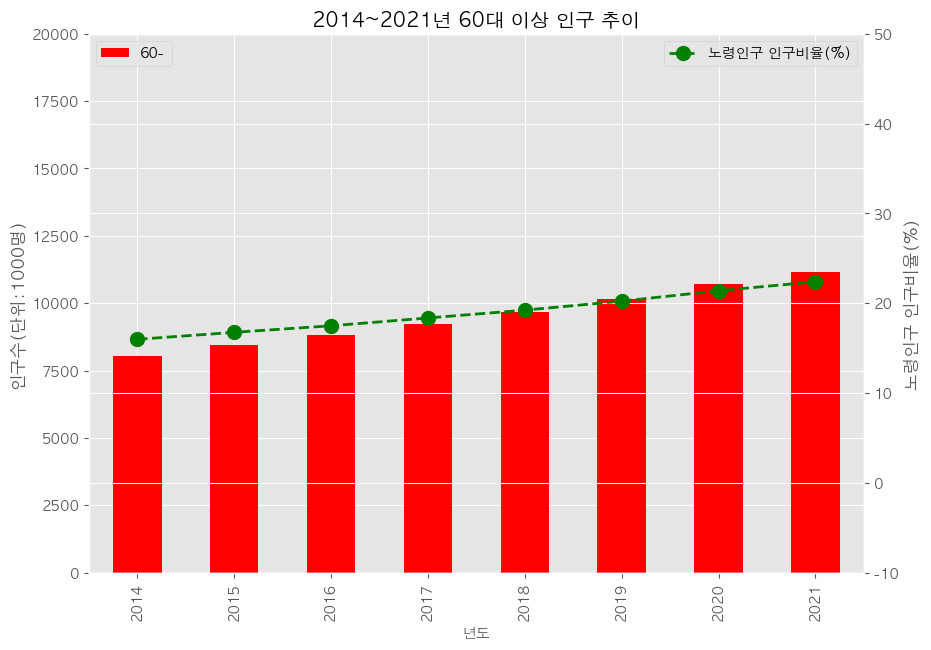

In [186]:
plt.style.use('ggplot')

# ax1 = (년도별연령별[['0-19','20-59','60-']]/1000).plot(
ax1 = (년도별연령별[['60-']]/1000).plot(
    kind='bar', 
    figsize=(10,7),
    stacked=True,
    color = ['red','grey','red']
)
ax2 = ax1.twinx() 
ax2.plot(
    [0,1,2,3,4,5,6,7],
    년도별연령별['60대 이상 전체인구 비율'],
    ls='--', # line style
    marker = 'o',
    markersize = 10,
    color = 'green',
    markerfacecolor="green",
    linewidth=2,
    label='노령인구 인구비율(%)'
)
ax1.set_ylim(0000, 20000)
ax2.set_ylim(-10, 50)
# ax2.set_ylim(2, 6)

ax1.set_xlabel('년도',size = 10)
ax1.set_ylabel("인구수(단위:1000명)")
ax2.set_ylabel('노령인구 인구비율(%)')

plt.title('2014~2021년 60대 이상 인구 추이', size = 14)

ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)

plt.show()